*****************************************************************************************************************
Estimation Method:  1
T=
 [[ 0.37591216  1.20339105  0.13601372]
 [ 0.08917403  0.83309893 -0.0260913 ]
 [ 0.16570029  0.36498811  0.15141457]]
D=
 [[0]
 [0]
 [0]]
Training Period: [100, 2250]
Mean squared error: 0.00
Coefficient of determination: 1.00


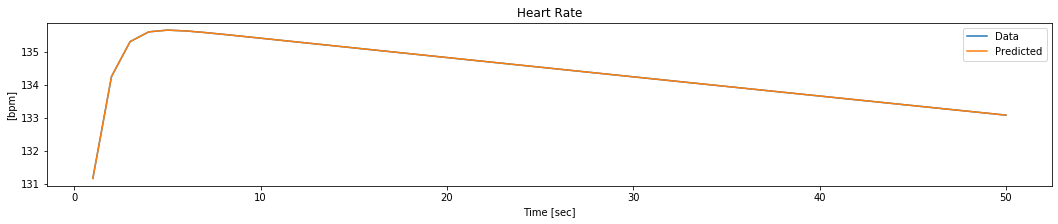

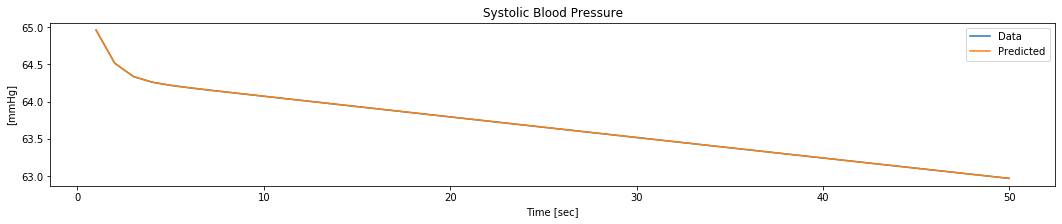

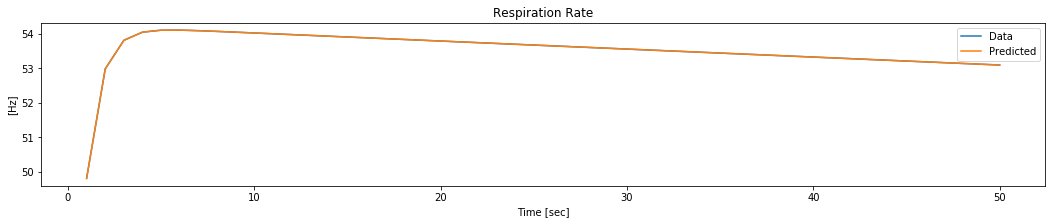

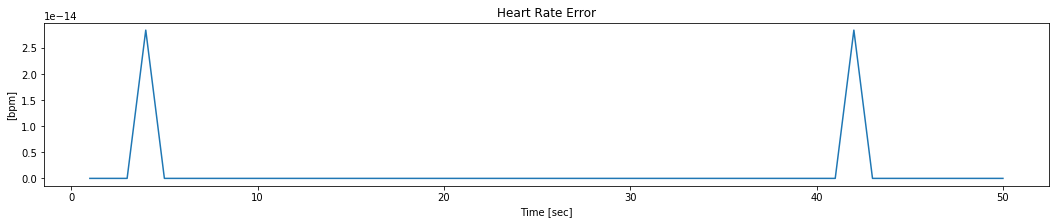

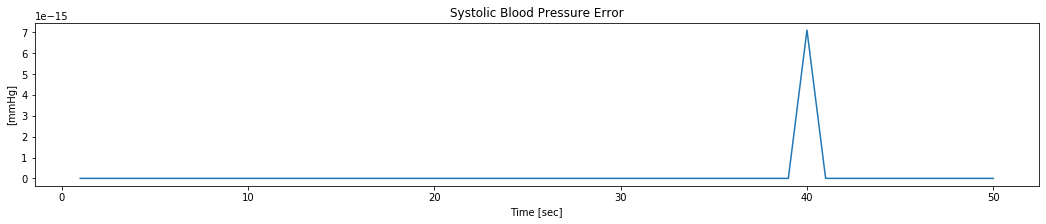

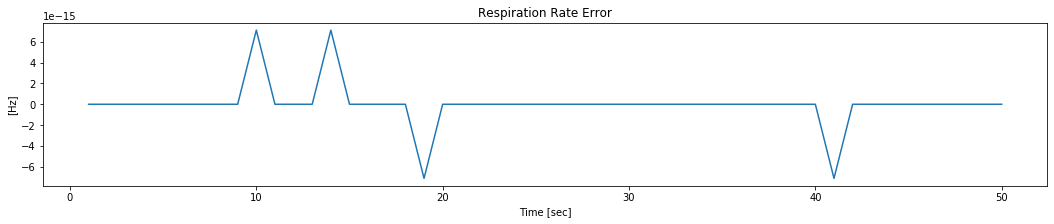

*****************************************************************************************************************
*****************************************************************************************************************
Estimation Method:  1
T=
 [[ 0.27115869  1.50455652  0.04032563]
 [ 0.10348905  0.79184204 -0.01355835]
 [ 0.11992565  0.55873797  0.03594087]]
D=
 [[0]
 [0]
 [0]]
Training Period: [100, 2250]
Mean squared error: 0.00
Coefficient of determination: 1.00


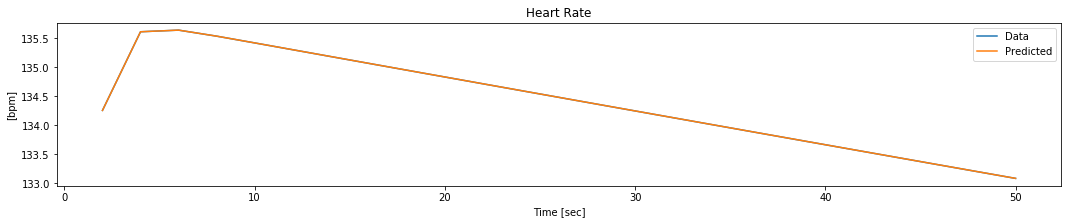

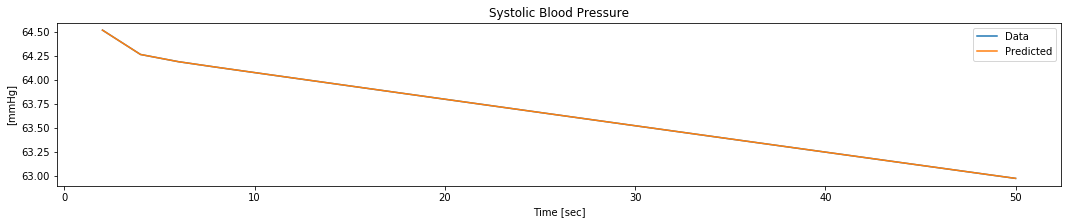

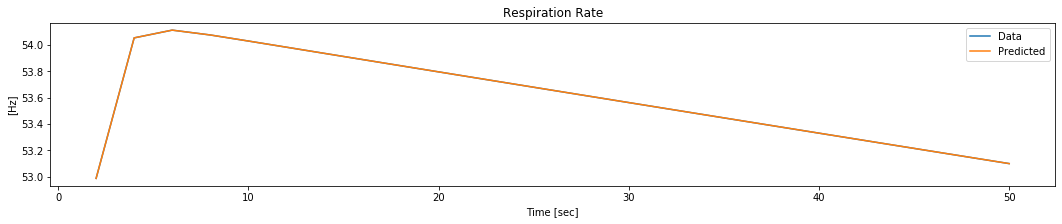

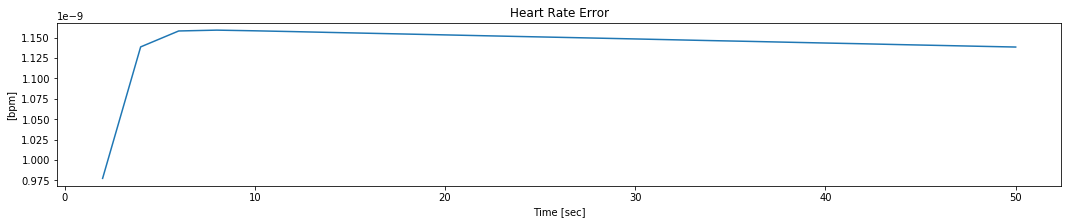

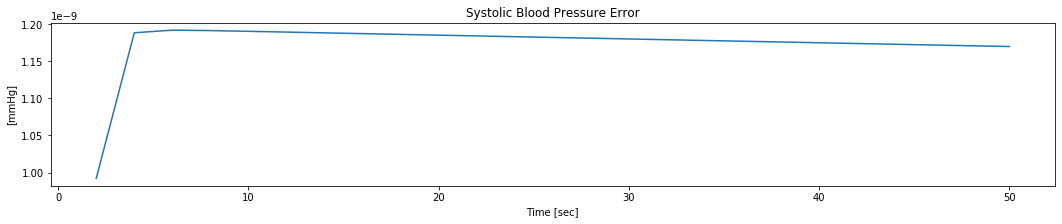

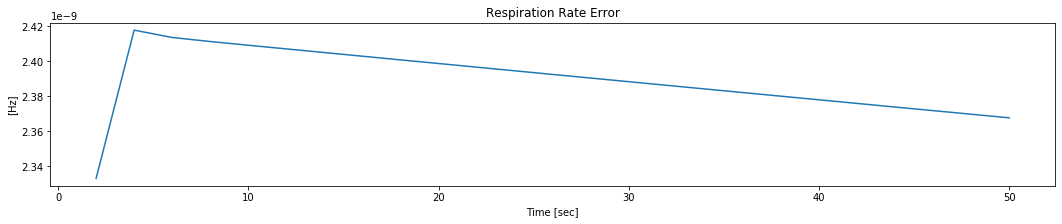

*****************************************************************************************************************


In [6]:
%run configuration.ipynb
%run linear-regression.ipynb

dont_care = 0

# build a model (the period itself doesn't matter)
train_start = 100 
train_end = 2250
model = find_T(train_start, train_end, None, 1)

# build the "processed data" according to the model with 1 Hz sampling frequency
data = np.array([[130],[65],[30]]) # hr[1]=130, bp[1]=65, rr[1]=30
last_coloumn_data = data
for i in range(50):
    last_coloumn_data = np.dot(model.T, last_coloumn_data)
    data = np.hstack((data,last_coloumn_data))

# test the built data with our model and then print results
time = np.arange(0,len(data[0]),1)
prediction = test_T(model, dont_care, dont_care, data, time)
print_prediction_results(prediction)



# Now we will derive a data with a lower sampling frequency from our built data ->  find its model ->  test it
hr = data[0]
bp = data[1]
rr = data[2]
time = np.arange(0,len(hr),1)

# linear interpolation
hr_interp_func = interp1d(time, hr)
bp_interp_func = interp1d(time, bp)
rr_interp_func = interp1d(time, rr)

# resampling with frequency 0.5 Hz
time = np.arange(0, len(hr), 1/0.5)
resampled_hr = hr_interp_func(time)
resampled_bp = bp_interp_func(time)
resampled_rr = rr_interp_func(time)

resampled_data = np.row_stack((resampled_hr, resampled_bp, resampled_rr))

# estimate a model according to the data after resampling
model = find_T(train_start, train_end, resampled_data, 1)

# call test_T & print_prediction_results
prediction = test_T(model, dont_care, dont_care, resampled_data, time)
print_prediction_results(prediction)
